<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

## Libraries

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import utils
%matplotlib inline

## Get a multiple LR dataset

In [225]:
df=pd.read_csv(r"MultipleLR.csv", header=None)
df

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [226]:
X = df.values[: , : -1]
Y = df.values[: , -1]
Y =Y.reshape(25,1)
print(X.shape)
print(Y.shape)
df.shape

(25, 3)
(25, 1)


(25, 4)

In [227]:
X

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]], dtype=int64)

## <b> Implementing adam with Mini Batch <b>

In [228]:
def AdamMB(x,y, alpha , beta1, beta2 ,batch_size = 5, epsilon = .000000000000000001, epochs = 1000):
    
    m = x.shape[0]
    n = x.shape[1]
    theta = np.zeros((n+1,1))
    theta_all = []
    cost_all = []
    vt = np.zeros((n+1,1))
    mt = np.zeros((n+1,1))
    x = np.column_stack((np.ones((m,1)), x))
    y = y.reshape(m,1)
    c = 2
    for i in range(epochs):
        for p in range(m // batch_size + 1):
            x_batch = x[p * batch_size :(p* batch_size) + batch_size , :]
            y_batch = y[p * batch_size :(p* batch_size) + batch_size]
            gradient = (1/batch_size) * np.sum(((x_batch @ theta)-y_batch) * x_batch, axis=0 ).reshape(n+1,1) 
            mt = mt * beta1 + (1-beta1) * gradient
            mt_hat = mt /(1-beta1**(i+1))
            vt = beta2 * vt + (1-beta2)* (gradient**2)    
            vt_hat = vt/(1-beta2**(i+1))
            
            theta = theta - (alpha/(np.sqrt(vt_hat) + epsilon)) * mt_hat
            if c == 1 or c == 0:
                print(vt)
            c += 1
        cost = 1/(2*m) * np.sum(np.square((x @ theta) - y))
        theta_all.append(theta)
        cost_all.append(cost)
        if i > 1:
            if abs(cost - cost_all[-2]) < 0.001:
                print(f'We took {i} iterations')
                print(cost_all[-2])
                print(cost)
                break
    print('final cost is:',cost)
    print('final gradient is:',np.linalg.norm(gradient, ord= 2))
    return theta_all, cost_all


In [229]:
theta,cost = AdamMB(X,Y , batch_size=  4, alpha=.002, beta1 = .9, beta2 = .82 , epsilon = 0.0000000001,epochs= 1000)
t0 = [x[0] for x in theta]
t1 = [x[1] for x in theta]
t2 = [x[2] for x in theta]
t3 = [x[3] for x in theta]
theta

We took 582 iterations
3.29253950401388
3.291541513441644
final cost is: 3.291541513441644
final gradient is: 43.987811850505125


[array([[0.02616876],
        [0.02579886],
        [0.02571096],
        [0.02588598]]),
 array([[0.05590446],
        [0.05528005],
        [0.0550709 ],
        [0.05542216]]),
 array([[0.08493415],
        [0.08409577],
        [0.08377035],
        [0.0842816 ]]),
 array([[0.11240124],
        [0.11137289],
        [0.11094009],
        [0.11159589]]),
 array([[0.13816442],
        [0.13696334],
        [0.13643157],
        [0.13721915]]),
 array([[0.16233762],
        [0.16097713],
        [0.16035352],
        [0.16126263]]),
 array([[0.18511546],
        [0.18360624],
        [0.18289668],
        [0.18391908]]),
 array([[0.20670031],
        [0.20505105],
        [0.20426041],
        [0.20538941]]),
 array([[0.22727489],
        [0.2254928 ],
        [0.22462513],
        [0.22585518]]),
 array([[0.24699508],
        [0.24508624],
        [0.24414491],
        [0.2454714 ]]),
 array([[0.26599086],
        [0.26396038],
        [0.26294829],
        [0.26436728]]),
 array([[0

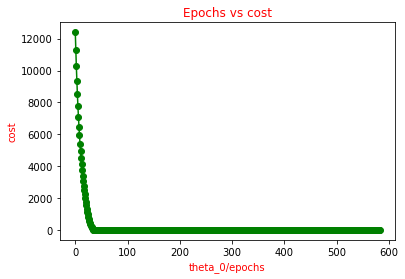

In [230]:
t0 = [x[0] for x in theta]
fig, ax = plt.subplots()
ax.plot(range(len(cost)), cost, linestyle = 'solid', marker = 'o' , color = 'g')
ax.set_xlabel('theta_0/epochs',color = 'r')
ax.set_ylabel('cost', color = 'r')
ax.set_title('Epochs vs cost',color = 'r');

Text(0.5, 1.0, 'theta0 vs cost')

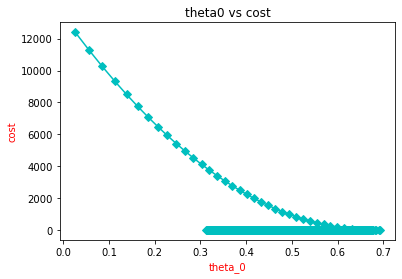

In [231]:
fig, ax = plt.subplots()
ax.plot(t0, cost, linestyle = 'solid', marker = 'D' , c = 'c')
ax.set_xlabel('theta_0',color = 'r')
ax.set_ylabel('cost', color = 'r');
ax.set_title("theta0 vs cost")

Text(0.5, 1.0, 'theta 1 vs cost function')

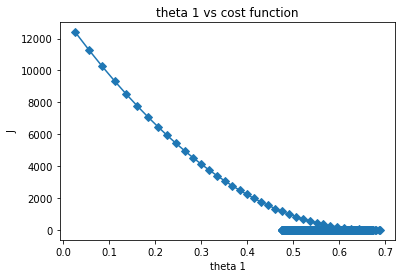

In [232]:
# theta 0
plt.plot(t1,cost,'D' , linestyle = 'solid')
plt.xlabel("theta 1")
plt.ylabel("J")
plt.title("theta 1 vs cost function")

In [233]:
x_first = np.ones((len(df.values),1))
X_t = np.concatenate((x_first , X) , axis = 1)
print(X_t.shape)
print(theta[-1].shape)
model = lambda theta,X : t0 + t1 * X
y_predicted = X_t @ t[-1]

print("accuracy r2_score = "  , r2_score(Y,y_predicted))

(25, 4)
(4, 1)
accuracy r2_score =  0.9888993536693413


## <b> Implementing adam with Batch <b>

In [234]:
def AdamBatch(x,y, alpha, beta1 , beta2 ,batch_size, epsilon , epochs):
    
    m = x.shape[0]
    n = x.shape[1]
    theta = np.zeros((n+1,1))
    theta_all = []
    cost_all = []
    vt = np.zeros((n+1,1))
    mt = np.zeros((n+1,1))
    x = np.column_stack((np.ones((m,1)), x))
    y = y.reshape(m,1)
    c = 2
    for i in range(epochs):
        for p in range(m // batch_size + 1):
            x_batch = x[p * batch_size :(p* batch_size) + batch_size , :]
            y_batch = y[p * batch_size :(p* batch_size) + batch_size]
            gradient = (1/batch_size) * np.sum(((x_batch @ theta)-y_batch) * x_batch, axis=0 ).reshape(n+1,1) 
            mt = mt * beta1 + (1-beta1) * gradient
            mt_hat = mt /(1-beta1**(i+1))
            vt = beta2 * vt + (1-beta2)* (gradient**2)    ### NO.4
            vt_hat = vt/(1-beta2**(i+1))
            
            theta = theta - (alpha/(np.sqrt(vt_hat) + epsilon)) * mt_hat
            if c == 1 or c == 0:
                print(vt)
            c += 1
        cost = 1/(2*m) * np.sum(np.square((x @ theta) - y))
        theta_all.append(theta)
        cost_all.append(cost)
        if i > 1:
            if abs(cost - cost_all[-2]) <  0.001:
                print(f'stop itertating at {i}')
                print(cost_all[-2])
                print(cost)
                break
    print('final cost is:',cost)
    print('final gradient is:',np.linalg.norm(gradient, ord= 2))
    return theta_all, cost_all


In [235]:
theta,cost = AdamBatch(X,Y , batch_size=  25, alpha=.033, beta1 = .9, beta2 = .82 , epsilon = 0.00000000001,epochs= 10000)
t0 = [x[0] for x in theta]
t1 = [x[1] for x in theta]
t2 = [x[2] for x in theta]
t3 = [x[3] for x in theta]
theta[1].shape

stop itertating at 608
3.0798264841512113
3.0804204761849
final cost is: 3.0804204761849
final gradient is: 0.0


(4, 1)

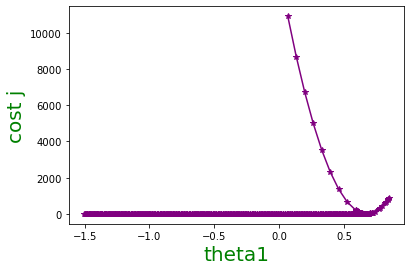

In [236]:
fig, ax = plt.subplots()
ax.plot(t0, cost, linestyle = 'solid', marker = '*' , color = 'purple')
ax.set_xlabel('theta1',color = 'g', fontdict={'size':20})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':20});

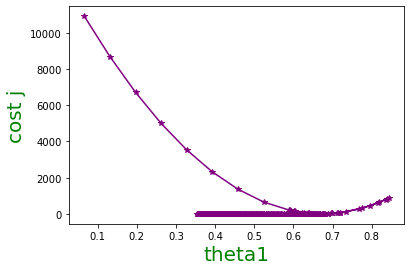

In [237]:
fig, ax = plt.subplots()
ax.plot(t1, cost, linestyle = 'solid', marker = '*' , color = 'purple')
ax.set_xlabel('theta1',color = 'g', fontdict={'size':20})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':20});

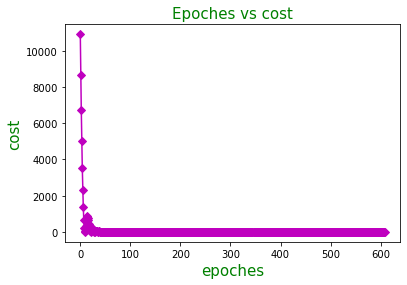

In [238]:
t0 = [x[0] for x in t]
fig, ax = plt.subplots()
ax.plot(range(len(j)), j, linestyle = 'solid', marker = 'D' , color = 'm')
ax.set_xlabel('epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost', color = 'g', fontdict={'size':15})
ax.set_title('Epoches vs cost',color = 'g', fontdict={'size':15});

In [239]:
x_first = np.ones((len(df.values),1))
X_t = np.concatenate((x_first , X) , axis = 1)
print(X_t.shape)
print(t[-1].shape)
model = lambda t,X : t0 + t1 * X
y_predicted = X_t @ t[-1]
r = r2_score(Y,y_predicted)
print("accuracy r2_score = "  , r)

(25, 4)
(4, 1)
accuracy r2_score =  0.9888993536693413


In [240]:
print(X_t)

[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]


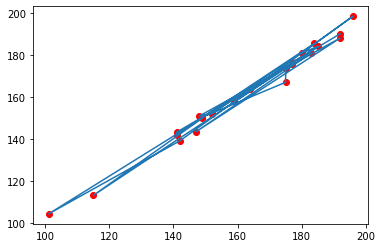

In [249]:
plt.scatter(Y,y_predicted,color="red")
plt.plot(Y,y_predicted)
plt.show()